In [ ]:
Introduction
The analysis aims to explore customer segmentation data to identify whether they can provide us with important insights 
into customer behavior. We will use a method of Clustering the data with K-means Clustering.

The idea of touching a specific touchpad is to separate them into smaller groups, through similar aspects between them. 
This grouping by common characteristics allows us to know more about who our subjects are and, thus, we can work with 
strategies to offer them a more assertive and personalized communication. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
customer_info = pd.read_excel(r'C:\Users\umuts\Desktop\common_dataset_touch_features_offset.xlsx')
customer_info.sample(5)

,user_id,touch_type,touch,finger,palm,fist,1,2,3,4,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200
0,0,0,False,False,False,False,4,0,12,-16,...,-51,4,1,3,-42,2,3,61,2,-1
760,10,0,False,False,False,False,-54,-8,-2,-7,...,-27,-4,60,-3,-47,-4,63,1,-60,9
1165,16,0,False,False,False,False,-1,11,19,0,...,-42,47,57,-41,-51,55,-6,54,56,9
819,10,0,False,False,False,False,1,-8,5,-8,...,-28,-49,7,47,-34,-60,8,55,-55,-53
218,2,9,True,False,True,False,60,1,-2,-1,...,51,-40,38,7,67,15,22,64,-23,38


In [ ]:
General info on the dataset:
We will first run a quick statistical analysis of the data. We will check for null values, 
get the general sense of the data and the types, to see if they reflect whats shown in the table above. We use:

The .info() method on the DataFrame to understand the data types in each column. We notice there are no missing
values and that all columns have numerical values in them. The .describe() method on the DataFrame shows summary info on the 
regular statistics you may apply to categorical/numerical data.

In [12]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Columns: 3206 entries, user_id to 3200
dtypes: bool(4), int64(3202)
memory usage: 50.2 MB


In [14]:
num_columns = ['user_id','touch_type']
cat_columns = ['touch', 'finger', 'palm', 'fist']

customer_info[cat_columns] = customer_info[cat_columns].astype('str')

In [15]:
customer_info.describe(include='object').T

,count,unique,top,freq
touch,2056,2,False,1144
finger,2056,2,False,1796
palm,2056,2,False,1718
fist,2056,2,False,1742


In [16]:
customer_info.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2056.0,14.144455,8.776936,0.0,7.0,14.0,22.0,29.0
touch_type,2056.0,2.208658,3.059943,0.0,0.0,0.0,4.0,9.0
1,2056.0,6.383268,37.765997,-62.0,-2.0,3.0,53.0,70.0
2,2056.0,-0.736868,7.140939,-22.0,-6.0,-1.0,5.0,21.0
3,2056.0,-1.372568,8.932638,-23.0,-8.0,-1.0,4.0,21.0
...,...,...,...,...,...,...,...,...
3196,2056.0,10.382782,36.713209,-61.0,-5.0,5.0,49.0,107.0
3197,2056.0,6.484922,37.415322,-62.0,-7.0,5.0,45.0,103.0
3198,2056.0,3.776265,39.689446,-69.0,-10.0,3.0,22.0,101.0
3199,2056.0,3.038911,36.621301,-65.0,-16.0,1.0,30.0,103.0


In [ ]:
Missing values
We have seen from the .info() method that there are no missing values.



In [ ]:
EDA
We start by taking a look at the distributions of the numerical variables user_id, touch_type.

We notice ID has a uniform distribution, which makes sense since it is an identifier of the subject and it will be dropped 
below. The variable 'user_id' has a heavy right skew, generated because of the lower limit at zero of the variable. If we are 
using K-Means clustering, there will be no need to normalize the feature, but we may have to do so for other models. The
feature  'touch_type' has the same right skew problem as the 'user_id' feature. We will have to be wary of this depending on the
model  we select.

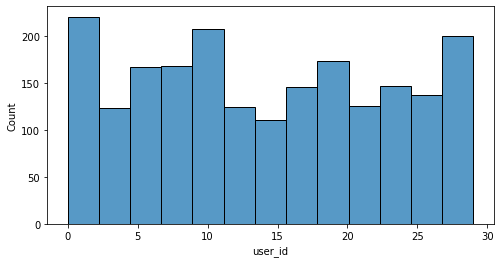

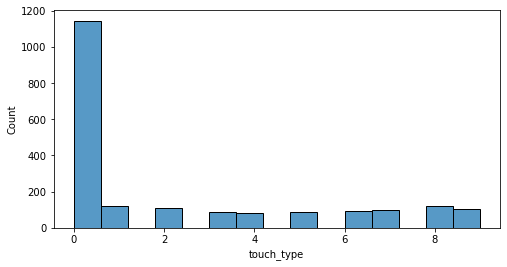

In [17]:
for numerical in num_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=customer_info, x=numerical)
    plt.savefig(numerical + '.png')

In [ ]:
Categorical Variables Distribution
Next, we take a look at categorical variables. Running univariant countplots, we reach the following conclusions:

Customer genders are quite balanced.
Marital status is also balanced.
Most customers have highschool level education. There are only 1,8% graduate students. We could join both categories 
('2' and '3') in a category called university & over.
Both the 'Occupation' and 'Settlement size' features seem to have a larger enough quantity of instances of each category.

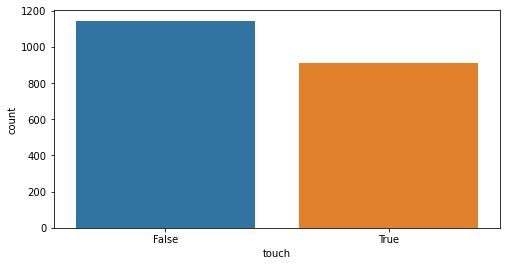

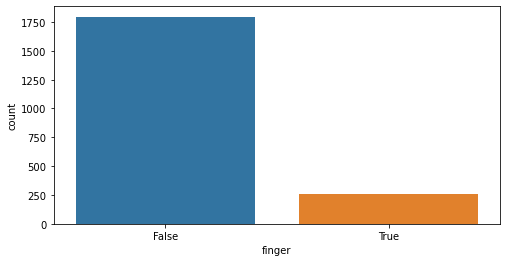

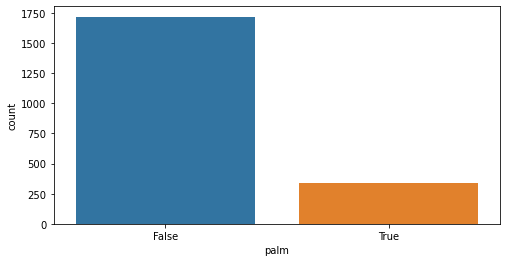

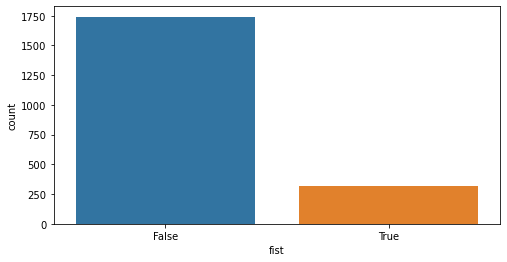

In [18]:
for category in cat_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=customer_info, x=category)

<AxesSubplot:xlabel='touch_type', ylabel='finger'>

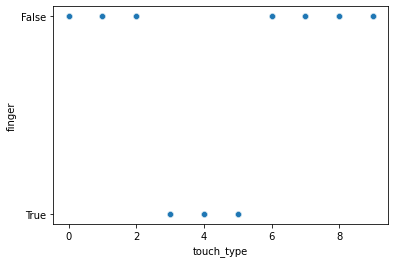

In [22]:
sns.scatterplot(x='touch_type', y='finger', data=customer_info)

In [ ]:
There is some small correlation between the user and touch type features. We notice that the slope of the line is very small,
which shows that the correlation between the features is low. Below we can see the calculation of the Pearson correlation
factor, which states that values have a small correlation between them.

In [24]:
import scipy.stats as stats
print(stats.pearsonr(customer_info['user_id'], customer_info['touch_type']))

(0.03949972631777232, 0.07334930836435809)


In [26]:
import scipy.stats as stats
print(stats.pearsonr(customer_info['user_id'], customer_info['touch_type']))

(0.03949972631777232, 0.07334930836435809)


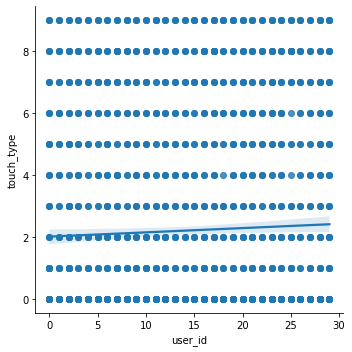

In [27]:
sns.lmplot(x='user_id', y='touch_type', data=customer_info)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


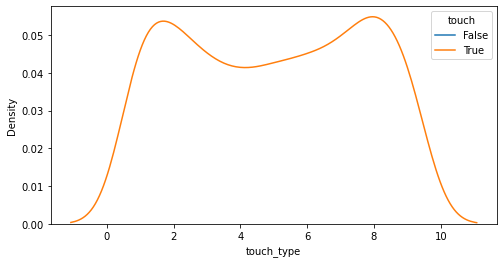

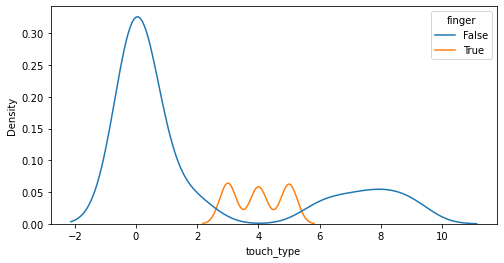

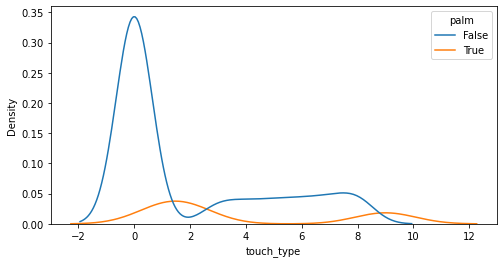

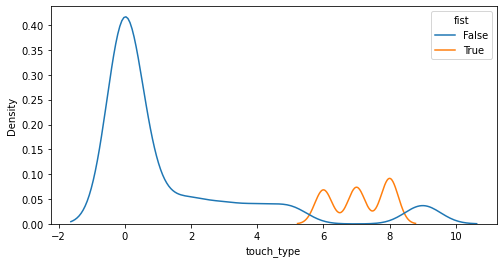

In [28]:
for category in cat_columns:
    for numerical in num_columns:
        if numerical != 'user_id':
            plt.figure(figsize=(8,4))
            sns.kdeplot(data=customer_info, x=numerical, hue=category) ## Non-normalized version of this plot by switching kdeplot for histplot

In [29]:
cat_columns

['touch', 'finger', 'palm', 'fist']

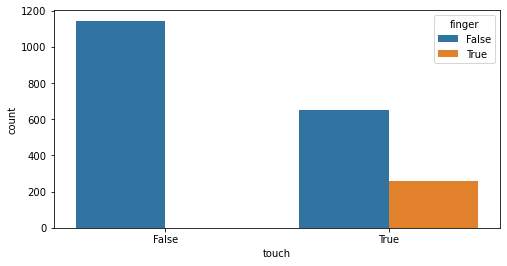

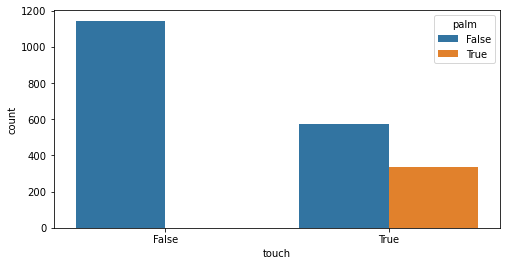

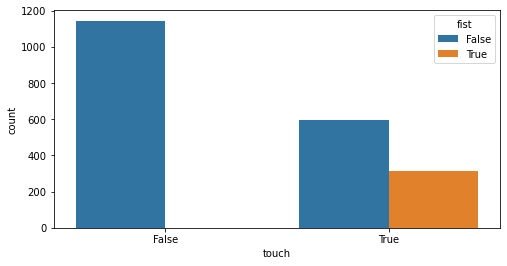

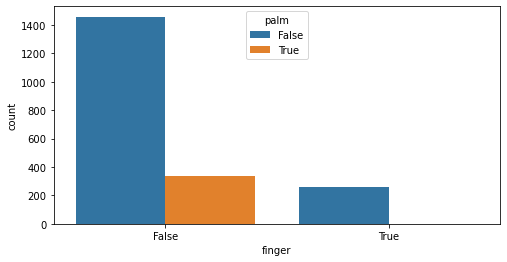

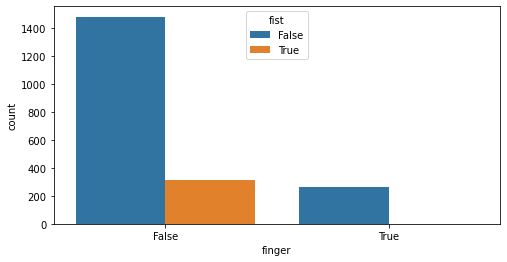

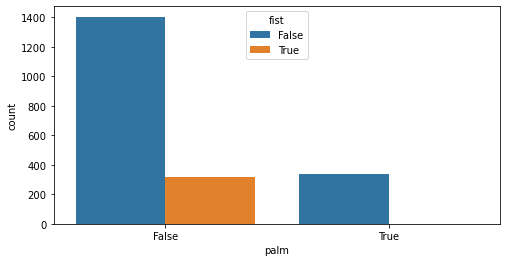

In [30]:
cat_aux = cat_columns.copy()
for category1 in cat_columns:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(8,4))
            sns.countplot(data=customer_info, x=category1, hue=category2)

In [ ]:
There are a interesting relationships that can be drawn from the data:
We can say that the touchpad detects the finger the most, then the fist and finally the palm.

In [31]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)

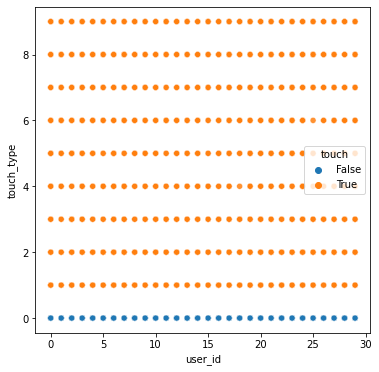

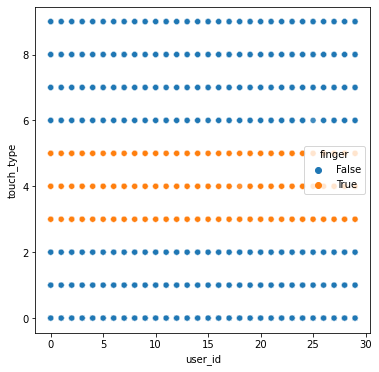

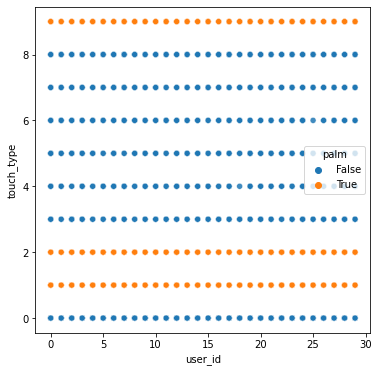

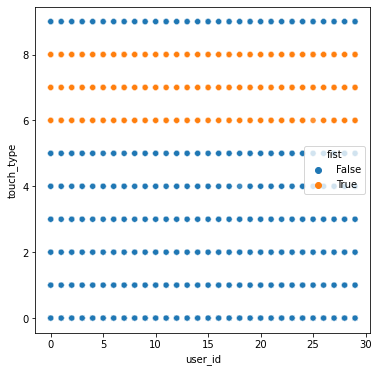

In [32]:
for cat in cat_columns:
    bivariate_scatter('user_id', 'touch_type', cat, customer_info)

In [33]:
from scipy import stats


In [34]:
normaltest_result_income = stats.normaltest(customer_info['touch_type'])[1]
normaltest_result_age    = stats.normaltest(customer_info['user_id'])[1]

print(f'The p-value for the null hypothesis of the Income being Normally distributed is {normaltest_result_income}')
print(f'The p-value for the null hypothesis of the Age    being Normally distributed is {normaltest_result_age}')

The p-value for the null hypothesis of the Income being Normally distributed is 6.62086380258517e-64
The p-value for the null hypothesis of the Age    being Normally distributed is 0.0


In [35]:
def apply_log(column):
    return np.log(column)

def normality_test(column):
    return stats.normaltest(column)

In [64]:
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



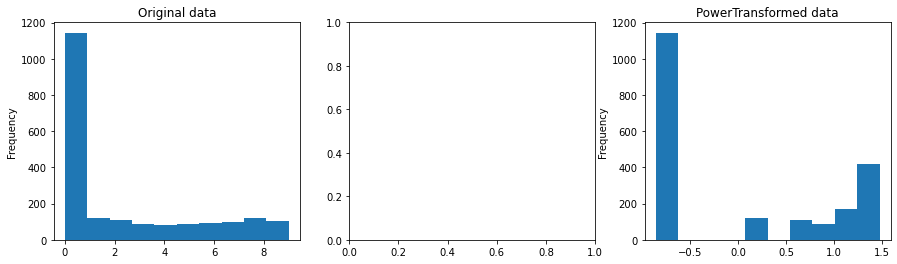

In [172]:
# PowerTransform data
feature = customer_info['touch_type'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature)
array_1d = feature_transf.flatten()
feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_income = apply_log(customer_info['touch_type'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));

# Plot original data & get metrics
customer_info['touch_type'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(customer_info['touch_type'])


# Plot power transformed data & get metrics
feature.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'PowerTransformer'])

In [173]:
normality_test(log_transformed_income)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:951: RuntimeWarning:

invalid value encountered in subtract



NormaltestResult(statistic=nan, pvalue=nan)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



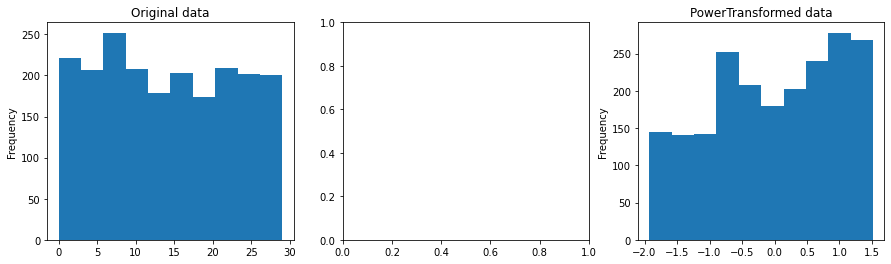

In [174]:
# PowerTransform data
feature2 = customer_info['user_id'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature2)
array_1d = feature_transf.flatten()
feature2 = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_age = apply_log(customer_info['user_id'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));

# Plot original data & get metrics
customer_info['user_id'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(customer_info['user_id'])

# Plot power transformed data & get metrics
feature2.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature2)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1,norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'PowerTransformer'])

In [175]:
metrics

,statistic,pvalue
Original data,2606.941682,0.000000e+00
PowerTransformer,740.938342,1.280216e-161


In [176]:
normality_test(log_transformed_income)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:951: RuntimeWarning:

invalid value encountered in subtract



NormaltestResult(statistic=nan, pvalue=nan)

In [177]:
metrics

,statistic,pvalue
Original data,2606.941682,0.000000e+00
PowerTransformer,740.938342,1.280216e-161


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



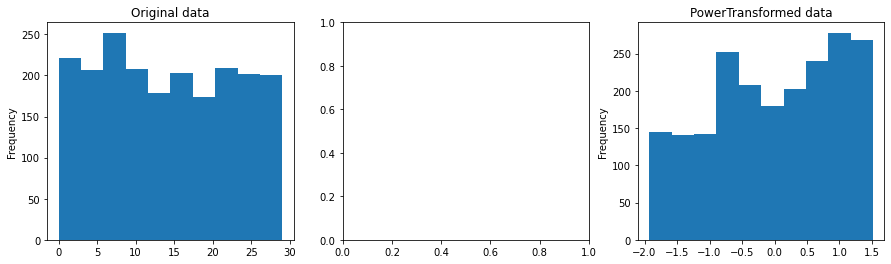

In [206]:
# PowerTransform data
feature2 = customer_info['user_id'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature2)
array_1d = feature_transf.flatten()
feature2 = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_age = apply_log(customer_info['user_id'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));

# Plot original data & get metrics
customer_info['user_id'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(customer_info['user_id'])


# Plot power transformed data & get metrics
feature2.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature2)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'PowerTransformer'])

In [207]:
metrics

,statistic,pvalue
Original data,2606.941682,0.000000e+00
PowerTransformer,740.938342,1.280216e-161


In [208]:
customer_info['transf_user_id'] = feature
customer_info['transf_touch_type']    = log_transformed_age

In [290]:
customer_transformed = customer_info.drop(['user_id', 'touch_type'], axis=1)
customer_transformed

,touch,finger,palm,fist,1,2,3,4,5,6,...,3197,3198,3199,3200,transf_user_id,transf_touch_type,transf_finger,transf_touch,transf_1,transf_2
0,False,False,False,False,4,0,12,-16,-2,0,...,3,61,2,-1,-0.861027,-inf,-0.861027,-inf,-0.861027,-inf
1,False,False,False,False,-52,-2,17,1,15,-9,...,49,63,47,6,-0.861027,-inf,-0.861027,-inf,-0.861027,-inf
2,False,False,False,False,2,7,14,-5,16,12,...,56,9,55,52,-0.861027,-inf,-0.861027,-inf,-0.861027,-inf
3,False,False,False,False,0,6,10,8,-2,2,...,55,53,-7,51,-0.861027,-inf,-0.861027,-inf,-0.861027,-inf
4,False,False,False,False,2,5,3,0,17,10,...,48,60,46,5,-0.861027,-inf,-0.861027,-inf,-0.861027,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,True,False,True,False,0,4,-10,3,-6,9,...,57,70,12,71,1.475158,3.367296,1.475158,3.367296,1.475158,3.367296
2052,True,False,True,False,8,-3,-13,-3,-9,6,...,65,15,6,71,1.475158,3.367296,1.475158,3.367296,1.475158,3.367296
2053,True,False,True,False,8,-9,-12,-16,-17,13,...,65,20,64,68,1.475158,3.367296,1.475158,3.367296,1.475158,3.367296
2054,True,False,True,False,56,0,0,-20,-16,-10,...,55,6,-6,51,1.475158,3.367296,1.475158,3.367296,1.475158,3.367296


In [291]:
customer_transformed.dtypes

touch                 object
finger                object
palm                  object
fist                  object
1                      int64
                      ...   
transf_touch_type    float64
transf_finger        float64
transf_touch         float64
transf_1             float64
transf_2             float64
Length: 3210, dtype: object

In [ ]:
Feature Scaling (MinMaxScaler)
Since there are categorical features scaled between 0 and 1 ('touch_type' feature), we will use scikit learns
MinMaxScaler to scale out data between 0 and 1. This is done so that the scale is equivalent to that of the 
'touch_type' feature (all values will be between zero and one). This is important for the K-Means clustering model, as it uses 
distance as a measure of similarity. Therefore, if we do not scale the features, we won't get accurate clusters.

In [292]:
from sklearn.preprocessing import MinMaxScaler

In [310]:
scaler = MinMaxScaler()
x = scaler.fit_transform(customer_transformed.iloc[: ,[5,10]])

In [313]:
x[0]

array([0.51162791, 0.05940594])

In [ ]:
K-Means Clustering
K-Means is a clustering algorithm based on distance to determine the similarity of different points. It creates clusters by 
assigning points to the cluster nearest to them.

Selecting the correct number of clusters
There are several ways to select the correct number of clusters, but they are all based in the amount of business insight 
we get from each cluster. It is not useful to find a lot of clusters if we cannot interpret them, or gain nothing by separating
them into different clategories. The number of clusters is an input to the model, but we cannot determine the number of 
clusters beforehand. So a good approximation is using the elbow method and selecting the number of groups that reduces 
a metric to a considerable amount; more would not add much information and less would mean the metric could still be improved 
significantly.

In [314]:
from sklearn.cluster import KMeans

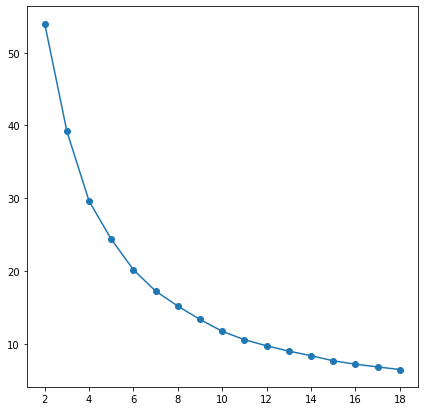

In [316]:
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(x)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

In [ ]:
When running the loop shown above, we notice that the elbow happens around 6-7 clusters, which would be a good approximation.
The curve is not very clear and you could also say that 12 is a good number as well, but you should understand that 12 clusters
is generally too much, so we would rather lose some information about the groups our customers belong to, than gaining more 
accuracy in the clustering used.

Even though we have a somewhat convincing result above, we will use the Silhouette scores to see if we can gain more insight
on how many clusters should we use. See the procedure below:

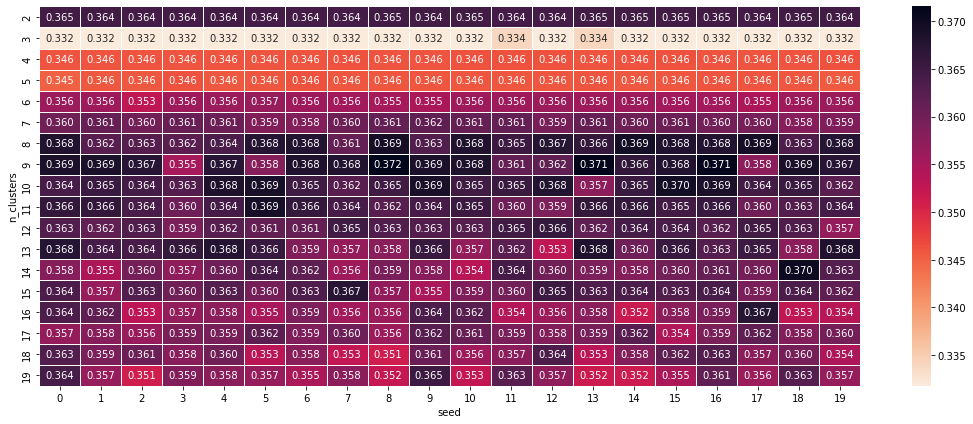

In [319]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=range(2, 20)
random_range  =range(0, 20)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer=KMeans(n_clusters=c, random_state=r)
        cluster_labels=clusterer.fit_predict(x)
        silhouette_avg=silhouette_score(x, cluster_labels)
        results.append([c,r,silhouette_avg])

result  =pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km=pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

In [ ]:
From the graph shown above, we see that there is a spike in the Silhouette score for 7 clusters, which is coherent with the 
results we got from the elbow method. This results show that choosing either 6 or 7 clusters should result in somewhat 
separated groups, which is what we are looking for. We see again that more clusters would reduce the metrics even further,
but interpretation for such a small quantity of features with so many clusters would be really hard.

We decide to create 6 and 7 clusters and use our business understanding to determine which classification provides more
insights about the subjects. Another option would be to select 14 or more, which is unrealistic given the size of the dataset.

In [320]:
from sklearn.decomposition import PCA


In [337]:
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x)

In [339]:
x_pca_df = pd.DataFrame(data=x_pca, columns=['X1', 'X2'])

In [340]:
kmeans=KMeans(n_clusters=6, random_state=0).fit(x)


In [341]:
labels = kmeans.labels_
x_pca_df['Labels'] = labels

In [342]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [343]:
x_pca_df.head()

,X1,X2,Labels
0,-0.018597,-0.254521,0
1,-0.060504,-0.218612,0
2,0.153661,-0.198828,2
3,0.155527,-0.019109,2
4,0.104840,-0.211939,2


In [344]:
x_pca_df['Labels'] = x_pca_df['Labels'].astype(str)

In [ ]:
We have already clustered the data into 6 distinct groups and done PCA to get 3 features out of the 7 we originally had. 
It is always important to remember that using PCA inherently means a loss of information, so the projections of the data 
in the new features X1, X2 and X3 can have some overlapping points, but in reality, when using K-Means clustering the border
points are clearly defined.

In [346]:
import plotly.express as px

fig = px.scatter_3d(x_pca_df, x='X1', y='X2', color=x_pca_df['Labels']);

In [347]:
fig.show()

In [350]:
results_df = customer_info.drop(['transf_touch_type', 'transf_user_id'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'user_id':'int32', 'touch_type':'int32'})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Columns: 3211 entries, user_id to Labels
dtypes: float64(4), int32(3), int64(3200), object(4)
memory usage: 50.3+ MB


In [351]:
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe().T  # .describe method provides general statistics about the data

In [352]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
user_id,275.0,13.814545,8.739444,0.000000,5.000000,15.000000,20.000000,28.000000
touch_type,275.0,2.247273,3.124652,0.000000,0.000000,0.000000,5.000000,9.000000
1,275.0,-8.927273,38.124773,-58.000000,-48.500000,0.000000,6.000000,66.000000
2,275.0,-4.229091,3.729233,-15.000000,-7.000000,-4.000000,-2.000000,4.000000
3,275.0,-0.989091,10.756252,-23.000000,-9.000000,-1.000000,7.000000,21.000000
...,...,...,...,...,...,...,...,...
transf_finger,275.0,-0.009959,1.013200,-0.861027,-0.861027,-0.861027,1.229729,1.475158
transf_touch,275.0,-inf,NaN,-inf,1.609438,2.708050,2.995732,3.332205
transf_1,275.0,-0.009959,1.013200,-0.861027,-0.861027,-0.861027,1.229729,1.475158
transf_2,275.0,-inf,NaN,-inf,1.609438,2.708050,2.995732,3.332205


In [ ]:
results_df[results_df['Labels'] == 0].hist(figsize=(1,5));

In [355]:
summary[1]

,count,mean,std,min,25%,50%,75%,max
user_id,475.0,14.680000,9.130484,0.000000,6.000000,14.000000,23.000000,29.000000
touch_type,475.0,2.109474,3.007132,0.000000,0.000000,0.000000,4.000000,9.000000
1,475.0,7.246316,33.057110,-60.000000,-1.000000,3.000000,14.000000,68.000000
2,475.0,-0.416842,2.335502,-5.000000,-2.000000,0.000000,2.000000,4.000000
3,475.0,-2.448421,8.508309,-21.000000,-8.000000,-2.000000,2.500000,21.000000
...,...,...,...,...,...,...,...,...
transf_finger,475.0,-0.020293,0.985877,-0.861027,-0.861027,-0.861027,1.117978,1.475158
transf_touch,475.0,-inf,NaN,-inf,1.791759,2.639057,3.135494,3.367296
transf_1,475.0,-0.020293,0.985877,-0.861027,-0.861027,-0.861027,1.117978,1.475158
transf_2,475.0,-inf,NaN,-inf,1.791759,2.639057,3.135494,3.367296


In [ ]:
results_df[results_df['Labels'] == 1].hist(figsize=(1,5));

In [357]:
summary[2]

,count,mean,std,min,25%,50%,75%,max
user_id,391.0,12.639386,7.921757,0.000000,7.000000,11.000000,19.000000,29.000000
touch_type,391.0,1.867008,2.881899,0.000000,0.000000,0.000000,3.000000,9.000000
1,391.0,33.227621,27.955493,-54.000000,2.000000,53.000000,56.000000,70.000000
2,391.0,7.624041,3.152424,3.000000,5.000000,7.000000,9.000000,21.000000
3,391.0,-0.547315,8.892935,-17.000000,-8.000000,-1.000000,5.000000,21.000000
...,...,...,...,...,...,...,...,...
transf_finger,391.0,-0.112298,0.970430,-0.861027,-0.861027,-0.861027,0.959761,1.475158
transf_touch,391.0,-inf,NaN,-inf,1.945910,2.397895,2.944439,3.367296
transf_1,391.0,-0.112298,0.970430,-0.861027,-0.861027,-0.861027,0.959761,1.475158
transf_2,391.0,-inf,NaN,-inf,1.945910,2.397895,2.944439,3.367296


In [ ]:
results_df[results_df['Labels'] == 2].hist(figsize=(1,3));
plt.savefig('cluster4_results')

In [360]:
from scipy.stats import ttest_ind
import numpy as np

age_cluster_0 = results_df[results_df['Labels'] == 0]['user_id']
age_cluster_1 = results_df[results_df['Labels'] == 1]['user_id']
age_cluster_2 = results_df[results_df['Labels'] == 2]['user_id']
age_cluster_3 = results_df[results_df['Labels'] == 3]['user_id']

first_clusters  = [1, 2]
second_clusters = [0, 3]
real_clusters = [age_cluster_0, age_cluster_1, age_cluster_2, age_cluster_3]

for num_clust_1 in first_clusters:
    for num_clust_2 in second_clusters:
        ttest,pval = ttest_ind(real_clusters[num_clust_1], real_clusters[num_clust_2])
        print(f'p-value of {num_clust_1} vs {num_clust_2} is:',pval)
        if pval <0.05:
            print("we reject null hypothesis")
        else:
            print("we accept null hypothesis")

p-value of 1 vs 0 is: 0.20427010891514585
we accept null hypothesis
p-value of 1 vs 3 is: 0.49234233944245354
we accept null hypothesis
p-value of 2 vs 0 is: 0.07140707857885438
we accept null hypothesis
p-value of 2 vs 3 is: 0.009817032221965042
we reject null hypothesis


In [361]:
summary[3]

,count,mean,std,min,25%,50%,75%,max
user_id,372.0,14.244624,9.186117,0.000000,5.000000,16.000000,22.000000,29.000000
touch_type,372.0,2.508065,3.162694,0.000000,0.000000,1.000000,5.000000,9.000000
1,372.0,-25.446237,28.834874,-62.000000,-51.250000,-42.000000,2.000000,58.000000
2,372.0,-10.540323,3.649907,-22.000000,-13.000000,-10.000000,-8.000000,-6.000000
3,372.0,1.669355,8.948841,-21.000000,-4.250000,2.000000,9.000000,21.000000
...,...,...,...,...,...,...,...,...
transf_finger,372.0,0.127349,0.998975,-0.861027,-0.861027,0.270962,1.229729,1.475158
transf_touch,372.0,-inf,NaN,-inf,1.609438,2.772589,3.091042,3.367296
transf_1,372.0,0.127349,0.998975,-0.861027,-0.861027,0.270962,1.229729,1.475158
transf_2,372.0,-inf,NaN,-inf,1.609438,2.772589,3.091042,3.367296


In [ ]:
results_df[results_df['Labels'] == 3].hist(figsize=(1,3));

In [363]:
summary[4]

,count,mean,std,min,25%,50%,75%,max
user_id,278.0,14.953237,9.033910,1.000000,7.000000,14.000000,24.000000,29.000000
touch_type,278.0,2.356115,3.208599,0.000000,0.000000,0.000000,5.000000,9.000000
1,278.0,-1.284173,29.122705,-62.000000,-2.000000,1.000000,7.000000,63.000000
2,278.0,-3.557554,3.210193,-14.000000,-6.000000,-3.000000,-1.000000,1.000000
3,278.0,-2.543165,7.884771,-21.000000,-9.000000,-3.000000,4.000000,19.000000
...,...,...,...,...,...,...,...,...
transf_finger,278.0,0.006139,1.025933,-0.861027,-0.861027,-0.861027,1.229729,1.475158
transf_touch,278.0,2.414235,0.894642,0.000000,1.945910,2.639057,3.178054,3.367296
transf_1,278.0,0.006139,1.025933,-0.861027,-0.861027,-0.861027,1.229729,1.475158
transf_2,278.0,2.414235,0.894642,0.000000,1.945910,2.639057,3.178054,3.367296


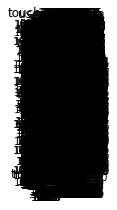

In [364]:
results_df[results_df['Labels'] == 4].hist(figsize=(1,3));

In [365]:
summary[5]

,count,mean,std,min,25%,50%,75%,max
user_id,265.0,14.758491,8.288945,2.000000,8.000000,14.000000,22.000000,29.000000
touch_type,265.0,2.275472,3.006867,0.000000,0.000000,0.000000,5.000000,9.000000
1,265.0,33.841509,29.320805,-55.000000,3.000000,53.000000,56.000000,67.000000
2,265.0,6.698113,3.574875,2.000000,4.000000,6.000000,9.000000,19.000000
3,265.0,-4.101887,7.158976,-19.000000,-10.000000,-4.000000,1.000000,20.000000
...,...,...,...,...,...,...,...,...
transf_finger,265.0,0.027193,1.017926,-0.861027,-0.861027,-0.861027,1.229729,1.475158
transf_touch,265.0,2.482972,0.708249,0.693147,2.079442,2.639057,3.091042,3.367296
transf_1,265.0,0.027193,1.017926,-0.861027,-0.861027,-0.861027,1.229729,1.475158
transf_2,265.0,2.482972,0.708249,0.693147,2.079442,2.639057,3.091042,3.367296


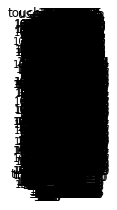

In [366]:
results_df[results_df['Labels'] == 5].hist(figsize=(1,3));

In [369]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids, columns = results_df.columns[:2], index = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5'])

,user_id,touch_type
C0,0.413277,0.118704
C1,0.501934,0.287045
C2,0.688931,0.251602
C3,0.266504,0.320638
C4,0.428894,0.476957
C5,0.667398,0.477004
